In [1]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ls_prices = []
ls_prices_m2 = []
ls_ads = []
ads_n=0
URL = "https://www.nehnutelnosti.sk/3-izbove-byty/predaj/?p%5Blocation%5D=t9.t7.t8"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

a = soup.find_all("a",{"class":"component-pagination__arrow-color d-flex align-items-center"})
next_page_href = a[0]["href"]
print(0)
ads = soup.find_all("div", 
                    {"class": [
                        "advertisement-item default-perex-rows is-dev-project mx-auto mb-4",
                        "advertisement-item default-perex-rows package--profi is-dev-project mx-auto mb-4",
                        "advertisement-item default-perex-rows perex-rows-3 is-dev-project mx-auto mb-4",
                        "advertisement-item default-perex-rows perex-rows-3 package--profi is-dev-project mx-auto mb-4",
                        
                    ]})
print(len(ads))
ads_n +=len(ads)
for item in ads:
    href = item.find("a", {"class": "advertisement-item--content__title d-block text-truncate"})["href"]
    prices = item.find("div", {"class": "advertisement-item--content__price col-auto pl-0 pl-md-3 pr-0 text-right mt-2 mt-md-0 align-self-end"})

    try:
        price, price_m2, _ = prices.text.replace(" ", "").replace(",", ".").replace("\n", "").split("€")
        ls_prices.append(int(price))
        ls_prices_m2.append(int(np.round(float(price_m2), 0)))
        ls_ads.append(href)
    except ValueError as e:
        print(prices)
        pass  

i=1
while next_page_href:
    print(i)
    print(next_page_href)
    
    page = requests.get(next_page_href)
    soup = BeautifulSoup(page.content, "html.parser")
    a = soup.find_all("a",{"class":"component-pagination__arrow-color d-flex align-items-center"})
    
    i+=1
    ads = soup.find_all("div", 
                        {"class": [
                            "advertisement-item default-perex-rows is-dev-project mx-auto mb-4",
                            "advertisement-item default-perex-rows package--profi is-dev-project mx-auto mb-4",
                            "advertisement-item default-perex-rows perex-rows-3 is-dev-project mx-auto mb-4",
                            "advertisement-item default-perex-rows perex-rows-3 package--profi is-dev-project mx-auto mb-4"
                        ]})
    print(len(ads))
    ads_n+=len(ads)
    for item in ads:
        href = item.find("a", {"class": "advertisement-item--content__title d-block text-truncate"})["href"]
        prices = item.find("div", {"class": "advertisement-item--content__price col-auto pl-0 pl-md-3 pr-0 text-right mt-2 mt-md-0 align-self-end"})
        
        try:
            price, price_m2, _ = prices.text.replace(" ", "").replace(",", ".").replace("\n", "").split("€")
            ls_prices.append(int(price))
            ls_prices_m2.append(int(np.round(float(price_m2), 0)))
            ls_ads.append(href)
        except ValueError as e:
            print(prices)
            pass
    try:
        next_page_href = a[1]["href"]
    except IndexError as e:
        next_page_href = None

0
30
<div class="advertisement-item--content__price col-auto pl-0 pl-md-3 pr-0 text-right mt-2 mt-md-0 align-self-end">
                            Cena dohodou                                                    </div>
1
https://www.nehnutelnosti.sk/3-izbove-byty/predaj/?p[location]=t9.t7.t8&p[page]=2
30
2
https://www.nehnutelnosti.sk/3-izbove-byty/predaj/?p[location]=t9.t7.t8&p[page]=3
30
<div class="advertisement-item--content__price col-auto pl-0 pl-md-3 pr-0 text-right mt-2 mt-md-0 align-self-end">
                            Cena dohodou                                                    </div>
3
https://www.nehnutelnosti.sk/3-izbove-byty/predaj/?p[location]=t9.t7.t8&p[page]=4
30
<div class="advertisement-item--content__price col-auto pl-0 pl-md-3 pr-0 text-right mt-2 mt-md-0 align-self-end">
                            229 900 €                            <span class="advertisement-item--content__price-unit"></span> </div>
<div class="advertisement-item--content__price col-auto p

In [3]:
ads_n

219

In [4]:
pd_nehnutelnosti = pd.DataFrame({"price": ls_prices, "price_m2":ls_prices_m2, "ads": ls_ads})
pd_nehnutelnosti["date"] = datetime.today().strftime('%Y-%m-%d')

In [5]:
pd_nehnutelnosti

,price,price_m2,ads,date
0,219900,2933,https://www.nehnutelnosti.sk/4890849/predaj-sl...,2022-12-05
1,265000,3155,https://www.nehnutelnosti.sk/4888648/4-izbovy-...,2022-12-05
2,214900,3070,https://www.nehnutelnosti.sk/4907217/prijemny-...,2022-12-05
3,195000,2534,https://www.nehnutelnosti.sk/4910073/3-izbovy-...,2022-12-05
4,349900,3683,https://www.nehnutelnosti.sk/4941985/3-izbovy-...,2022-12-05
...,...,...,...,...
202,269000,3893,https://www.nehnutelnosti.sk/4872373/predaj-3-...,2022-12-05
203,269000,3293,https://www.nehnutelnosti.sk/4854139/kompletne...,2022-12-05
204,210000,3134,https://www.nehnutelnosti.sk/4866128/bytoc-rk-...,2022-12-05
205,224900,3073,https://www.nehnutelnosti.sk/4848542/rezervova...,2022-12-05


In [6]:
pdf_previous = pd.read_csv("Documents/byt/nehnutelosti_lamac_dubravka_karlovka.csv")

In [7]:
pd_nehnutelnosti = pd.concat([pdf_previous, pd_nehnutelnosti], axis=0).reset_index(drop=True).drop_duplicates()

In [8]:
pd_nehnutelnosti.to_csv("Documents/byt/nehnutelosti_lamac_dubravka_karlovka.csv", index=False)

No handles with labels found to put in legend.


Mean price : 240147.81028938908
Median price : 222000.0
Mode price : 209900


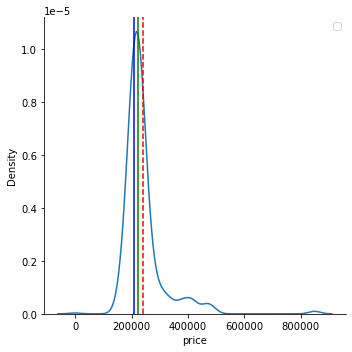

In [9]:
mean=pd_nehnutelnosti['price'].mean()
median=pd_nehnutelnosti['price'].median()
mode=pd_nehnutelnosti['price'].mode().values[0]
sns.displot(pd_nehnutelnosti, x="price", kind="kde")

plt.axvline(mean, color='r', ls="--")
plt.axvline(median, color='g', ls='-')
plt.axvline(mode, color='b', ls='-')
plt.legend(loc='upper right')
print(f"Mean price : {mean}")
print(f"Median price : {median}")
print(f"Mode price : {mode}")

Mean price : 3216.540192926045
Median price : 3083.5
Mode price : 2999


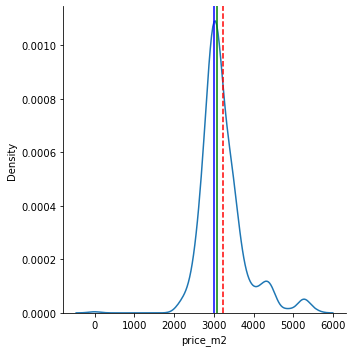

In [10]:
mean=pd_nehnutelnosti['price_m2'].mean()
median=pd_nehnutelnosti['price_m2'].median()
mode=pd_nehnutelnosti['price_m2'].mode().values[0]
sns.displot(pd_nehnutelnosti, x="price_m2", kind="kde")

plt.axvline(mean, color='r', ls="--")
plt.axvline(median, color='g', ls='-')
plt.axvline(mode, color='b', ls='-')
print(f"Mean price : {mean}")
print(f"Median price : {median}")
print(f"Mode price : {mode}")

In [12]:
pd_nehnutelnosti.sort_values("price_m2")[0]

KeyError: 0